In [1]:
from likelihood.regression_models import arima
from likelihood.tools import generate_series, scale, rescale
from likelihood import walkers
import numpy as np
import matplotlib.pyplot as plt 

plt.rcParams['font.size'] = 12
plt.style.use('bmh')

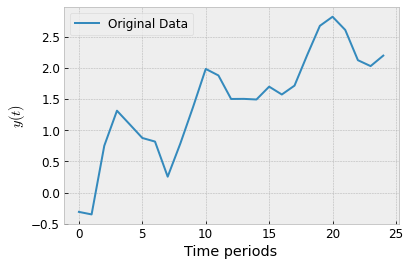

In [2]:
# We generate a time series with 25 points and with slope
a = generate_series(1, 25, incline=True)
y_serie = np.copy(a[0, :, 0])

# Graph the data for visualization
plt.plot(range(len(y_serie)), y_serie, label = 'Original Data')
plt.legend()
plt.xlabel('Time periods')
plt.ylabel('$y(t)$')
plt.show()

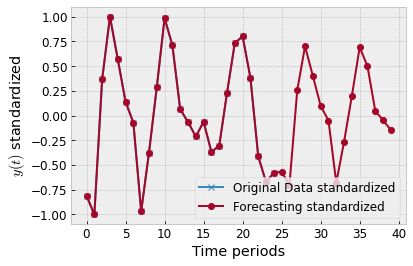

In [3]:
# Standardize the data and subtract the slope
y_scale, values = rescale(a)
y_new = y_scale[0, :, 0]

# We define the regression model
model = arima(y_new, nwalkers = 1, noise = 0.2)
model.train()

# We predict 15 points forward
y_pred = model.predict(15)

# Standardized original data and prediction are graphed
plt.plot(range(len(y_new)), y_new, '-x', label = 'Original Data standardized')
plt.plot(range(len(y_pred[:])), y_pred[:], '-o', label = 'Forecasting standardized')
plt.legend()
plt.xlabel('Time periods')
plt.ylabel('$y(t)$ standardized')
plt.show()

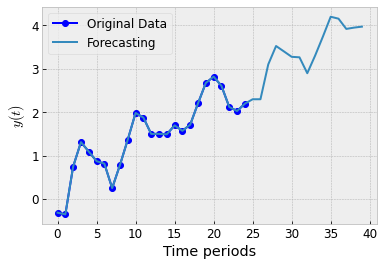

In [4]:
# We change the shape of the data predicted by the model
y_pred = y_pred[..., np.newaxis]
y_pred = y_pred.reshape((-1, 40, 1))
y_pred.shape

# Once the shape has been changed, 
# we proceed to restore the original magnitude and slope 
# of the data through the scale function
y_pred = scale(y_pred, values)
a = scale(a, values)

# and we graph again...
plt.plot(range(len(a[0, :, 0])), a[0, :, 0], 'o-b', label = 'Original Data')
plt.plot(range(y_pred.shape[1]), y_pred[0, :, 0], label = 'Forecasting')
plt.legend()
plt.xlabel('Time periods')
plt.ylabel('$y(t)$')
plt.show()